In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

In [ ]:
Lagos_df = pd.read_csv('/content/drive/MyDrive/Data Science and Analytics/Projects /HNG/Stage 1 Task/LAGOS_crosschecked.csv')

In [ ]:
Lagos_df.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,Result_Sheet_Corrected,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File
0,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-001,"ST. JOSEPH SECONDARY SCHOOL, MANGORO",120,744,True,-1,False,True,False,False,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
1,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-002,"15, SHOMIDE STREET",111,716,True,-1,False,False,False,False,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
2,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-004,"8, SEBIOTIMO STREET",108,843,True,-1,False,True,False,False,UNKNOWN,31,57,11,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
3,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-005,"6, SEBIOTIMO STREET",114,731,True,-1,False,True,False,False,UNKNOWN,28,66,5,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
4,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-006,WITHIN OLABI SQUARE,80,539,True,-1,False,False,False,False,UNKNOWN,24,28,16,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....


In [ ]:
Lagos_df.shape

(11911, 19)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Data Science and Analytics/Projects /HNG/Stage 1 Task/polling-units.csv')

In [ ]:
df_with_coord = df2[df2.state_name == 'LAGOS']
df_with_coord

,name,ward_name,local_government_name,state_name,location.latitude,location.longitude
18775,AMUWO ODOFIN BOYS HIGH SCHOOL I,"AMUWO-ODOFIN HOUSING ESTATE, MILE 2",AMUWO-ODOFIN,LAGOS,6.457817,3.309881
18776,AMUWO ODOFIN BOYS HIGH SCHOOL II,"AMUWO-ODOFIN HOUSING ESTATE, MILE 2",AMUWO-ODOFIN,LAGOS,6.457817,3.309881
18777,IN FRONT OF BLOCK 449,"AMUWO-ODOFIN HOUSING ESTATE, MILE 2",AMUWO-ODOFIN,LAGOS,NaN,NaN
18778,"BESIDE BLK. 358, AMUWO ODOFIN","AMUWO-ODOFIN HOUSING ESTATE, MILE 2",AMUWO-ODOFIN,LAGOS,6.482885,3.293575
18779,"OPPOSITE BLK. 358, AMUWO ODOFIN","AMUWO-ODOFIN HOUSING ESTATE, MILE 2",AMUWO-ODOFIN,LAGOS,6.482885,3.293575
...,...,...,...,...,...,...
32092,ARMY HIGH SCH. EPE IV,OKE-BALOGUN,EPE,LAGOS,6.589537,3.989107
32093,ERESE VILLAGE,OKE-BALOGUN,EPE,LAGOS,6.588703,3.948104
32094,IMAUSA VILLAGE,OKE-BALOGUN,EPE,LAGOS,6.621419,3.932076
32095,"INFRONT OF GRAMMAR SCHOOL ESTATE, IRAYE ROAD,...",OKE-BALOGUN,EPE,LAGOS,6.594580,3.987196


In [ ]:
df_with_coord.rename(columns={'name': 'PU-Name'}, inplace=True)
df_with_coord.head()

,PU-Name,ward_name,local_government_name,state_name,location.latitude,location.longitude
18775,AMUWO ODOFIN BOYS HIGH SCHOOL I,"AMUWO-ODOFIN HOUSING ESTATE, MILE 2",AMUWO-ODOFIN,LAGOS,6.457817,3.309881
18776,AMUWO ODOFIN BOYS HIGH SCHOOL II,"AMUWO-ODOFIN HOUSING ESTATE, MILE 2",AMUWO-ODOFIN,LAGOS,6.457817,3.309881
18777,IN FRONT OF BLOCK 449,"AMUWO-ODOFIN HOUSING ESTATE, MILE 2",AMUWO-ODOFIN,LAGOS,NaN,NaN
18778,"BESIDE BLK. 358, AMUWO ODOFIN","AMUWO-ODOFIN HOUSING ESTATE, MILE 2",AMUWO-ODOFIN,LAGOS,6.482885,3.293575
18779,"OPPOSITE BLK. 358, AMUWO ODOFIN","AMUWO-ODOFIN HOUSING ESTATE, MILE 2",AMUWO-ODOFIN,LAGOS,6.482885,3.293575


In [ ]:
df_with_coord.shape

(13322, 6)

In [ ]:
Merged_df = pd.merge(Lagos_df, df_with_coord, on='PU-Name', how='left')
Merged_df.head(2)

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,APC,LP,PDP,NNPP,Results_File,ward_name,local_government_name,state_name,location.latitude,location.longitude
0,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-001,"ST. JOSEPH SECONDARY SCHOOL, MANGORO",120,744,True,-1,False,...,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,ISALE/IDIMANGORO,AGEGE,LAGOS,NaN,NaN
1,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-002,"15, SHOMIDE STREET",111,716,True,-1,False,...,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,ISALE/IDIMANGORO,AGEGE,LAGOS,6.611684,3.327618


In [ ]:
Merged_df.drop(columns=['ward_name', 'state_name', 'local_government_name'], inplace=True)
Merged_df.head(2)

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,location.latitude,location.longitude
0,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-001,"ST. JOSEPH SECONDARY SCHOOL, MANGORO",120,744,True,-1,False,...,False,False,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,NaN,NaN
1,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-002,"15, SHOMIDE STREET",111,716,True,-1,False,...,False,False,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.611684,3.327618


In [ ]:
Merged_df

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,location.latitude,location.longitude
0,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-001,"ST. JOSEPH SECONDARY SCHOOL, MANGORO",120,744,True,-1,False,...,False,False,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,NaN,NaN
1,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-002,"15, SHOMIDE STREET",111,716,True,-1,False,...,False,False,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.611684,3.327618
2,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-004,"8, SEBIOTIMO STREET",108,843,True,-1,False,...,False,False,UNKNOWN,31,57,11,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.610059,3.327579
3,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-005,"6, SEBIOTIMO STREET",114,731,True,-1,False,...,False,False,UNKNOWN,28,66,5,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.609893,3.327540
4,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-006,WITHIN OLABI SQUARE,80,539,True,-1,False,...,False,False,UNKNOWN,24,28,16,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,LAGOS,IKORODU,BAIYEKU/ORETA,24-12-11-029,"OPEN SPACE AT OKUNUGA ROUND ABOUT, OFFIN-ILE",75,138,True,-1,False,...,False,False,UNKNOWN,47,22,3,0,https://docs.inecelectionresults.net/elections...,NaN,NaN
12061,LAGOS,OJO,OKOKOMAIKO,24-17-02-032,OPEN SPACE INFRONT OF OKOKO TOWN HALL,133,276,True,-1,False,...,False,False,UNKNOWN,71,51,8,1,https://docs.inecelectionresults.net/elections...,6.473401,3.203665
12062,LAGOS,OJO,OKOKOMAIKO,24-17-02-033,OPEN SPACE IN FRONT OF NO 1 OLANREWAJU STR.,119,198,True,-1,False,...,False,False,UNKNOWN,35,78,2,1,https://docs.inecelectionresults.net/elections...,NaN,NaN
12063,LAGOS,OJO,OKOKOMAIKO,24-17-02-034,"OPEN SPACE AT NO 6, AGOMALE STREET",59,107,True,-1,False,...,False,False,UNKNOWN,46,5,3,0,https://docs.inecelectionresults.net/elections...,6.466659,3.190997


In [ ]:
Merged_df.shape

(12065, 21)

In [ ]:
Merged_df.isna().sum()

State                        0
LGA                          0
Ward                         0
PU-Code                      0
PU-Name                      0
Accredited_Voters            0
Registered_Voters            0
Results_Found                0
Transcription_Count          0
Result_Sheet_Stamped         0
Result_Sheet_Corrected       0
Result_Sheet_Invalid         0
Result_Sheet_Unclear         0
Result_Sheet_Unsigned        0
APC                          0
LP                           0
PDP                          0
NNPP                         0
Results_File                 0
location.latitude         2891
location.longitude        2891
dtype: int64

In [ ]:
Merged_df.dropna(inplace=True)
Merged_df.shape

(9174, 21)

In [ ]:
Merged_df.to_csv('Lagos_df_with_coordinates.csv', index=False)

In [ ]:
New_Lagos_df = pd.read_csv('Lagos_df_with_coordinates.csv')
New_Lagos_df.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,location.latitude,location.longitude
0,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-002,"15, SHOMIDE STREET",111,716,True,-1,False,...,False,False,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.611684,3.327618
1,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-004,"8, SEBIOTIMO STREET",108,843,True,-1,False,...,False,False,UNKNOWN,31,57,11,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.610059,3.327579
2,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-005,"6, SEBIOTIMO STREET",114,731,True,-1,False,...,False,False,UNKNOWN,28,66,5,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.609893,3.327540
3,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-006,WITHIN OLABI SQUARE,80,539,True,-1,False,...,False,False,UNKNOWN,24,28,16,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041
4,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-007,KAMORU ALIMI/SEBIOTIMO STREET I,128,676,True,-1,False,...,False,False,UNKNOWN,77,19,7,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041


In [ ]:
coordinates = New_Lagos_df[['location.latitude', 'location.longitude']]
coordinates

,location.latitude,location.longitude
0,6.611684,3.327618
1,6.610059,3.327579
2,6.609893,3.327540
3,6.614014,3.325041
4,6.614014,3.325041
...,...,...
9169,6.537352,3.517419
9170,6.536796,3.508307
9171,6.536796,3.508307
9172,6.473401,3.203665


### Clustering with DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle

In [ ]:
coordinates['lat_radians'] = np.radians(coordinates['location.latitude'])
coordinates['lon_radians'] = np.radians(coordinates['location.longitude'])

In [ ]:
coordinates.head()

,location.latitude,location.longitude,lat_radians,lon_radians
0,6.611684,3.327618,0.115396,0.058078
1,6.610059,3.327579,0.115367,0.058077
2,6.609893,3.327540,0.115364,0.058077
3,6.614014,3.325041,0.115436,0.058033
4,6.614014,3.325041,0.115436,0.058033


In [ ]:
# Haversine formula dist threshold for 1 km radius
eps = 1/6371

In [ ]:
# preparing coordinates for clustering
coord = coordinates[['lat_radians' , 'lon_radians']].to_numpy()

In [ ]:
model = DBSCAN(eps=eps , min_samples= 5, metric='haversine', algorithm= 'ball_tree')

In [ ]:
model.fit(coord)

DBSCAN(algorithm='ball_tree', eps=0.0001569612305760477, metric='haversine')

In [ ]:
model.labels_

array([ 0,  0,  0, ..., -1,  0,  0])

In [ ]:
coordinates['cluster'] = model.labels_

In [ ]:
coordinates.head()

,location.latitude,location.longitude,lat_radians,lon_radians,cluster
0,6.611684,3.327618,0.115396,0.058078,0
1,6.610059,3.327579,0.115367,0.058077,0
2,6.609893,3.327540,0.115364,0.058077,0
3,6.614014,3.325041,0.115436,0.058033,0
4,6.614014,3.325041,0.115436,0.058033,0


In [ ]:
coordinates.cluster.unique()

array([ 0, -1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 55, 39, 40, 41, 42, 43, 44, 45, 46, 48, 47,
       49, 50, 51, 52, 53, 54])

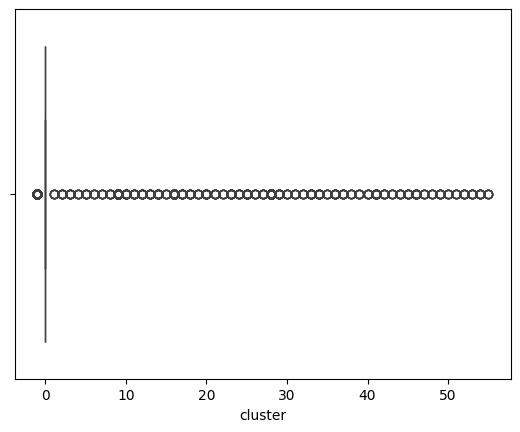

In [ ]:
# Box plot showing the distribution of the clusters
sns.boxplot(x=coordinates['cluster'])
plt.show()

In [ ]:
New_Lagos_df['PU-Clusters'] = coordinates['cluster']
New_Lagos_df.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,location.latitude,location.longitude,PU-Clusters
0,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-002,"15, SHOMIDE STREET",111,716,True,-1,False,...,False,UNKNOWN,0,0,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.611684,3.327618,0
1,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-004,"8, SEBIOTIMO STREET",108,843,True,-1,False,...,False,UNKNOWN,31,57,11,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.610059,3.327579,0
2,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-005,"6, SEBIOTIMO STREET",114,731,True,-1,False,...,False,UNKNOWN,28,66,5,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.609893,3.327540,0
3,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-006,WITHIN OLABI SQUARE,80,539,True,-1,False,...,False,UNKNOWN,24,28,16,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041,0
4,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-007,KAMORU ALIMI/SEBIOTIMO STREET I,128,676,True,-1,False,...,False,UNKNOWN,77,19,7,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041,0


In [ ]:
# Identidying the polling units in the outlier clusters
New_Lagos_df[New_Lagos_df['PU-Clusters'] == -1 ]

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,location.latitude,location.longitude,PU-Clusters
411,LAGOS,AJEROMI/IFELODUN,AGO HAUSA,24-02-01-025,BESIDE K & S CHURCH (ERADIRI STREET),74,436,True,-1,False,...,False,UNKNOWN,18,45,9,1,https://docs.inecelectionresults.net/elections...,43.609435,-79.583052,-1
587,LAGOS,AJEROMI/IFELODUN,TOLU,24-02-05-035,NAVY BARRACKS GATE II,83,802,True,-1,False,...,False,UNKNOWN,18,40,8,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.442389,3.298589,-1
595,LAGOS,AJEROMI/IFELODUN,TOLU,24-02-05-045,IN FRONT OF C & S CHURCH (ILAJE STREET),124,539,True,-1,False,...,False,UNKNOWN,67,34,13,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,43.648459,-79.373438,-1
1024,LAGOS,ALIMOSHO,IKOTUN/IJEGUN,24-03-04-033,IN FRONT OF COMM. HOUSE NATIONAL PET. IKOTUN I,43,667,True,-1,False,...,False,UNKNOWN,19,19,4,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.496126,3.280372,-1
1025,LAGOS,ALIMOSHO,IKOTUN/IJEGUN,24-03-04-034,IN FRONT OF COMM. HOUSE NATIONAL PET. IKOTUN II,70,849,True,-1,False,...,False,UNKNOWN,34,29,4,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.496126,3.280372,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9161,LAGOS,IKORODU,BAIYEKU/ORETA,24-12-11-012,AROGUNDADE VILLA / AROMIRE JUNCTION RENECON RD,80,124,True,-1,False,...,False,UNKNOWN,144,22,6,0,https://docs.inecelectionresults.net/elections...,6.552774,3.538694,-1
9165,LAGOS,IKORODU,BAIYEKU/ORETA,24-12-11-019,WITHIN EWU ABIYE VILLAGE II,51,85,True,-1,False,...,False,UNKNOWN,37,10,1,0,https://docs.inecelectionresults.net/elections...,6.552419,3.522760,-1
9168,LAGOS,IKORODU,BAIYEKU/ORETA,24-12-11-023,"JUNCTION UNITY AVENUE, OFFIN ILE",59,88,True,-1,False,...,False,UNKNOWN,43,9,0,0,https://docs.inecelectionresults.net/elections...,6.551191,3.540320,-1
9170,LAGOS,IKORODU,BAIYEKU/ORETA,24-12-11-026,"JUNCTION BABA ODE, OFFIN ILE",143,219,True,-1,False,...,False,UNKNOWN,96,42,1,0,https://docs.inecelectionresults.net/elections...,6.536796,3.508307,-1


### Calculating Outlier Scores

In [ ]:
# duplicate the dataframe
New_Lagos = New_Lagos_df.copy()

### NEW STEP

__Let's see if it works__

In [ ]:
# Calculating Z-Scores within each cluster
Parties = ['APC', 'PDP', 'LP', 'NNPP']

# function to calculate z-score within each cluster
def cal_z_scores(df, parties):
  z_scores = pd.DataFrame(index = df.index)
  clusters = df['PU-Clusters'].unique()

  for cluster in clusters:
    if cluster == -1:
      continue # skip outliers
    cluster_df = df[df['PU-Clusters'] == cluster]

    for party in parties:
      mean_votes = cluster_df[party].mean()
      std_votes = cluster_df[party].std()
      if std_votes == 0:
        z_scores.loc[cluster_df.index, party + '_z_score'] = 0
      else:
        z_scores.loc[cluster_df.index, party + '_z_score'] = (cluster_df[party] - mean_votes)/ std_votes

  return z_scores

In [ ]:
# calculate z scores
z_scores = cal_z_scores(New_Lagos, Parties)
New_Lagos = pd.concat([New_Lagos, z_scores], axis=1)

In [ ]:
New_Lagos.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,PDP,NNPP,Results_File,location.latitude,location.longitude,PU-Clusters,APC_z_score,PDP_z_score,LP_z_score,NNPP_z_score
0,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-002,"15, SHOMIDE STREET",111,716,True,-1,False,...,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.611684,3.327618,0,-1.346039,-0.808091,-0.954593,-0.190905
1,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-004,"8, SEBIOTIMO STREET",108,843,True,-1,False,...,11,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.610059,3.327579,0,-0.262131,0.924887,0.240790,-0.190905
2,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-005,"6, SEBIOTIMO STREET",114,731,True,-1,False,...,5,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.609893,3.327540,0,-0.367025,-0.020374,0.429535,0.109795
3,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-006,WITHIN OLABI SQUARE,80,539,True,-1,False,...,16,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041,0,-0.506885,1.712605,-0.367387,0.109795
4,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-007,KAMORU ALIMI/SEBIOTIMO STREET I,128,676,True,-1,False,...,7,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.614014,3.325041,0,1.346249,0.294713,-0.556132,-0.190905


### Distribution of Clusters Showing Z-Scores

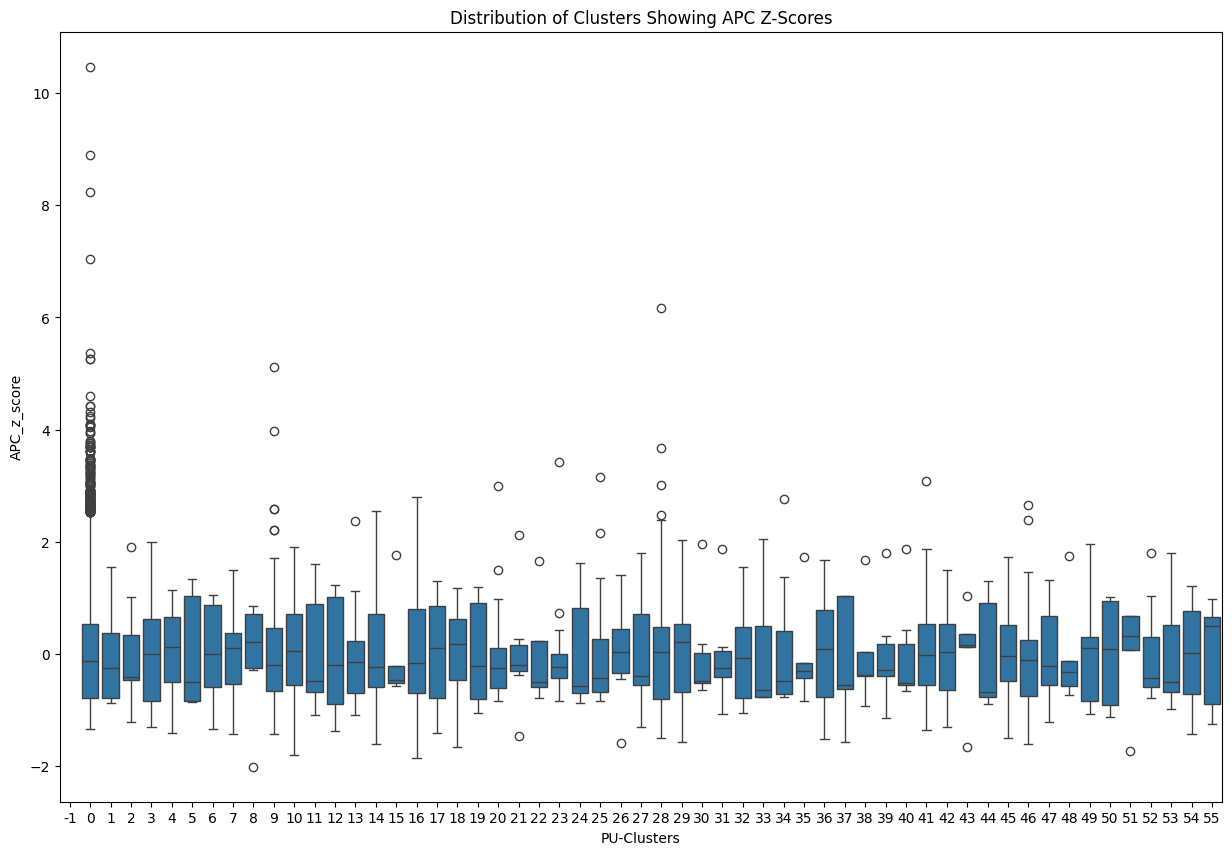

In [ ]:
# show the distribution of the New_Lagos polling units
plt.figure(figsize=(15, 10))
plt.title('Distribution of Clusters Showing APC Z-Scores')
sns.boxplot(x='PU-Clusters', y='APC_z_score', data=New_Lagos)
plt.show()


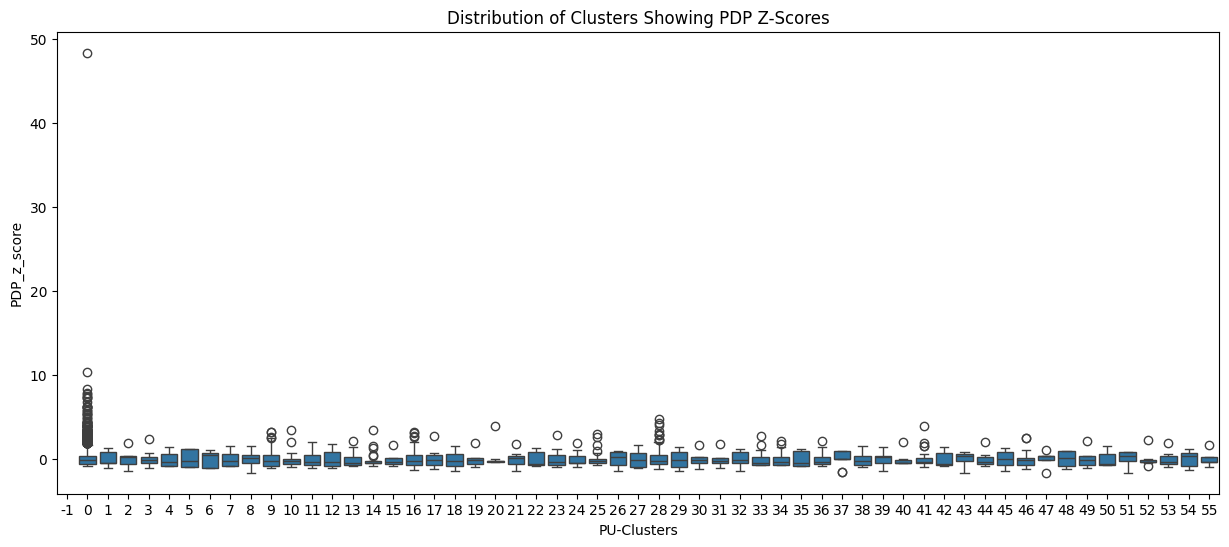

In [ ]:
# show the distribution of the New_Lagos polling units
plt.figure(figsize=(15, 6))
plt.title('Distribution of Clusters Showing PDP Z-Scores')
sns.boxplot(x='PU-Clusters', y='PDP_z_score', data=New_Lagos)
plt.show()

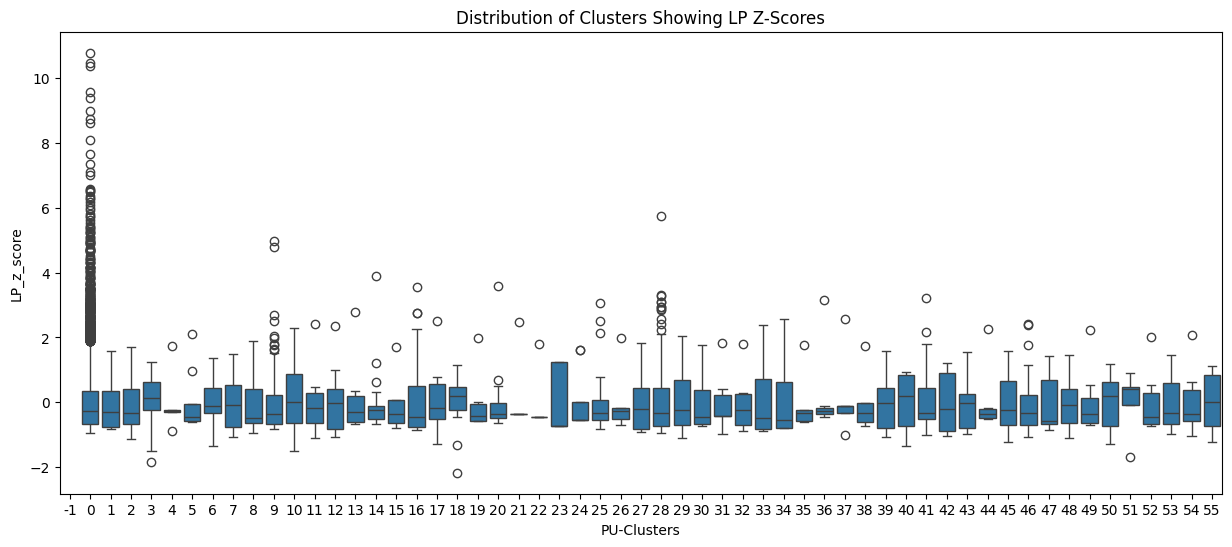

In [ ]:
# show the distribution of the New_Lagos polling units
plt.figure(figsize=(15, 6))
plt.title('Distribution of Clusters Showing LP Z-Scores')
sns.boxplot(x='PU-Clusters', y='LP_z_score', data=New_Lagos)
plt.show()

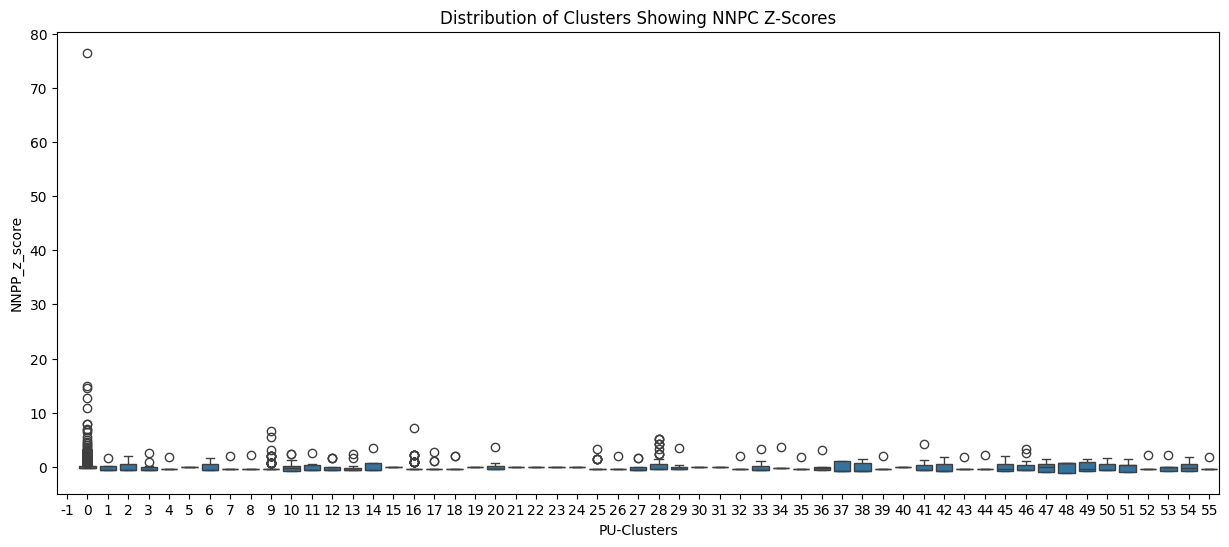

In [ ]:
# show the distribution of the New_Lagos polling units
plt.figure(figsize=(15, 6))
plt.title('Distribution of Clusters Showing NNPC Z-Scores')
sns.boxplot(x='PU-Clusters', y='NNPP_z_score', data=New_Lagos)
plt.show()

In [ ]:
# identify outliers based on z-score threshold
z_scores_threshold = 3

# identify outliers
outliers = pd.DataFrame(index=New_Lagos.index)
for party in Parties:
  outliers[party + '_is_outlier'] = (New_Lagos[party + '_z_score'].abs() > z_scores_threshold)

# add a column to indicate if any party in a polling unit is an outlier
outliers['is_outlier'] = outliers[[party + '_is_outlier' for party in Parties]].any(axis=1)

# filter out the outliers
outlier_polling_units = New_Lagos[outliers['is_outlier']]

print("Number of outlier polling units:", len(outlier_polling_units))
print("These are the outlier polling units:")
print(outlier_polling_units)
outlier_polling_units_df = pd.DataFrame(outlier_polling_units)
outlier_polling_units_df

Number of outlier polling units: 336
These are the outlier polling units:
      State           LGA                   Ward       PU-Code  \
31    LAGOS         AGEGE       ISALE/IDIMANGORO  24-01-01-036   
35    LAGOS         AGEGE       ISALE/IDIMANGORO  24-01-01-043   
112   LAGOS         AGEGE       ONIWAYA/PAPA-UKU  24-01-03-074   
118   LAGOS         AGEGE      AGBOTIKUYO/DOPEMU  24-01-04-003   
190   LAGOS         AGEGE                OKEKOTO  24-01-06-008   
...     ...           ...                    ...           ...   
8905  LAGOS  OSHODI/ISOLO                  OKOTA  24-18-09-082   
8912  LAGOS  OSHODI/ISOLO                  OKOTA  24-18-09-089   
8913  LAGOS  OSHODI/ISOLO                  OKOTA  24-18-09-090   
9113  LAGOS      SURULERE                  ITIRE  24-20-11-062   
9153  LAGOS      SURULERE  SHITTA/OGUNLANA DRIVE  24-20-07-057   

                                                PU-Name  Accredited_Voters  \
31                                     20, IPAYE STREET

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,PDP,NNPP,Results_File,location.latitude,location.longitude,PU-Clusters,APC_z_score,PDP_z_score,LP_z_score,NNPP_z_score
31,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-036,"20, IPAYE STREET",98,633,True,-1,False,...,27,5,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.633127,3.388001,0,0.157446,3.445583,-0.598075,1.312598
35,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-043,"3, OLOKO STREET",116,791,True,-1,False,...,29,8,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.624398,3.277510,0,0.821777,3.760670,-0.786820,2.214700
112,LAGOS,AGEGE,ONIWAYA/PAPA-UKU,24-01-03-074,"8, MORICASS ROAD",134,913,True,-1,False,...,8,11,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.619070,3.316442,0,1.765826,0.452257,-0.765848,3.116802
118,LAGOS,AGEGE,AGBOTIKUYO/DOPEMU,24-01-04-003,OYEWOLE ROAD I,109,802,True,-1,False,...,27,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.620982,3.306376,0,0.367235,3.445583,-0.346416,-0.190905
190,LAGOS,AGEGE,OKEKOTO,24-01-06-008,"1, AWOYINFA STREET",87,697,True,-1,False,...,31,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.624636,3.322671,0,0.297305,4.075757,-0.849735,-0.190905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,LAGOS,OSHODI/ISOLO,OKOTA,24-18-09-082,JUNCTION OF EMEKA NZOM STR./ GREEN FIELD EST,503,1107,True,-1,False,...,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.494661,3.297618,0,-1.276110,-0.808091,9.405392,-0.190905
8912,LAGOS,OSHODI/ISOLO,OKOTA,24-18-09-089,JUNCTION OF ASO ROCK/ CANAL VIEW,219,352,True,-1,False,...,3,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.508089,3.294759,0,-1.101286,-0.335461,3.386534,-0.190905
8913,LAGOS,OSHODI/ISOLO,OKOTA,24-18-09-090,JUNCTION OF ABBA STREET/ BEN BRIGHT OZURUMBA STR,224,324,True,-1,False,...,1,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.497958,3.292308,0,-1.171215,-0.650548,3.512364,-0.190905
9113,LAGOS,SURULERE,ITIRE,24-20-11-062,AINA STREET BY HOUSE NO. 31.,98,399,True,-1,False,...,36,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.512534,3.354252,0,0.437165,4.863475,-0.199614,-0.190905


In [ ]:
# convert outlier polling units to dataframe
outlier_polling_units_df = pd.DataFrame(outlier_polling_units)

### The Outlier Polling Units

In [ ]:
outlier_polling_units_df

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,PDP,NNPP,Results_File,location.latitude,location.longitude,PU-Clusters,APC_z_score,PDP_z_score,LP_z_score,NNPP_z_score
31,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-036,"20, IPAYE STREET",98,633,True,-1,False,...,27,5,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.633127,3.388001,0,0.157446,3.445583,-0.598075,1.312598
35,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-043,"3, OLOKO STREET",116,791,True,-1,False,...,29,8,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.624398,3.277510,0,0.821777,3.760670,-0.786820,2.214700
112,LAGOS,AGEGE,ONIWAYA/PAPA-UKU,24-01-03-074,"8, MORICASS ROAD",134,913,True,-1,False,...,8,11,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.619070,3.316442,0,1.765826,0.452257,-0.765848,3.116802
118,LAGOS,AGEGE,AGBOTIKUYO/DOPEMU,24-01-04-003,OYEWOLE ROAD I,109,802,True,-1,False,...,27,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.620982,3.306376,0,0.367235,3.445583,-0.346416,-0.190905
190,LAGOS,AGEGE,OKEKOTO,24-01-06-008,"1, AWOYINFA STREET",87,697,True,-1,False,...,31,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.624636,3.322671,0,0.297305,4.075757,-0.849735,-0.190905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,LAGOS,OSHODI/ISOLO,OKOTA,24-18-09-082,JUNCTION OF EMEKA NZOM STR./ GREEN FIELD EST,503,1107,True,-1,False,...,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.494661,3.297618,0,-1.276110,-0.808091,9.405392,-0.190905
8912,LAGOS,OSHODI/ISOLO,OKOTA,24-18-09-089,JUNCTION OF ASO ROCK/ CANAL VIEW,219,352,True,-1,False,...,3,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.508089,3.294759,0,-1.101286,-0.335461,3.386534,-0.190905
8913,LAGOS,OSHODI/ISOLO,OKOTA,24-18-09-090,JUNCTION OF ABBA STREET/ BEN BRIGHT OZURUMBA STR,224,324,True,-1,False,...,1,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.497958,3.292308,0,-1.171215,-0.650548,3.512364,-0.190905
9113,LAGOS,SURULERE,ITIRE,24-20-11-062,AINA STREET BY HOUSE NO. 31.,98,399,True,-1,False,...,36,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.512534,3.354252,0,0.437165,4.863475,-0.199614,-0.190905


In [ ]:
outlier_polling_units_df[outlier_polling_units.Result_Sheet_Stamped == True]

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,PDP,NNPP,Results_File,location.latitude,location.longitude,PU-Clusters,APC_z_score,PDP_z_score,LP_z_score,NNPP_z_score
1617,LAGOS,AMUWO-ODOFIN,SATELLITE,24-04-07-043,B/W UNION BANK ESTATE,295,927,True,-1,True,...,2,0,https://docs.inecelectionresults.net/elections...,6.447798,3.256605,0,-0.297096,-0.493004,4.456087,-0.190905
2625,LAGOS,IFAKO-IJAYE,IJAIYE/OJOKORO,24-10-08-052,20 OSHOTA ST. IJAIYE OJOKORO JANKARA,238,1717,True,-1,True,...,9,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.668439,3.296527,0,3.583995,0.609800,0.681194,0.109795
2786,LAGOS,IKEJA,AIRPORT/ONIPETESI/ONILEKERE,24-11-04-004,OPP. NO. 12 MICHAEL AKINOLA ST.,291,990,True,-1,True,...,3,0,https://docs.inecelectionresults.net/elections...,6.602417,3.322785,0,1.276319,-0.335461,3.386534,-0.190905
3226,LAGOS,KOSOFE,OWORONSHOKI,24-13-01-038,JUNCTION OF OLAYIWOLA OWOIYA ST./BABAYEMI ST.,226,1247,True,-1,True,...,34,3,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.557221,3.400441,0,2.325263,4.548388,0.660222,0.711197
3556,LAGOS,LAGOS ISLAND,IDUNTAFA,24-14-07-005,FRONT OF 18 ONILEGBALE ST. I,162,562,True,-1,True,...,10,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.441762,3.400819,0,3.304277,0.767344,-0.891678,-0.190905
3583,LAGOS,LAGOS ISLAND,ISALE-AGBEDE,24-14-09-006,ISALE GANGAN ST./ISALE AGBEDE,164,899,True,-1,True,...,1,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.456491,3.391723,0,4.108467,-0.650548,-0.870706,-0.190905
4622,LAGOS,OJO,OJO TOWN,24-17-01-006,AT THE BARRACKS B/STOP II,173,789,True,-1,True,...,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.460009,3.228578,0,-1.346039,-0.808091,10.789519,-0.190905
4817,LAGOS,OJO,SABO,24-17-11-012,JUNCTION OF TESUBI CLOSE I,224,993,True,-1,True,...,3,2,https://docs.inecelectionresults.net/elections...,6.460762,3.189146,0,-0.961427,-0.335461,3.197790,0.410496
7041,LAGOS,ETI-OSA,ADO/LANGBASA/BADORE,24-08-07-012,"SCHOOL PREMISES, ADDO",138,750,True,-1,True,...,3,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.501474,3.598940,34,0.553736,0.363422,0.858116,3.614784
7915,LAGOS,IKORODU,IGBOGBO II,24-12-10-022,JUNCTION OF WURAOLA STREET SELEWU,363,549,True,-1,True,...,8,5,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.612830,3.501180,28,1.263692,0.256073,3.103386,4.258743


### Determine Parties Responsible for the Outlier Behaviour


In [ ]:
# identify which party's votes are responsible for the outlier behaviours
responsible_parties = pd.DataFrame(index=outlier_polling_units.index)

for party in Parties:
  responsible_parties[party + '_responsible'] = outliers.loc[outlier_polling_units.index, party + '_is_outlier']

# add a column to indicate which parties are responsible for the outlier behaviour
responsible_parties['responsible_parties'] = responsible_parties.apply(lambda row: [party for party in Parties if row[party + '_responsible']], axis = 1)

# combine the outlier polling units with the responsible parties
outlier_polling_units = pd.concat([outlier_polling_units_df, responsible_parties], axis=1)

print("Outlier polling units with responsible parties:")
print(outlier_polling_units[['location.latitude', 'location.longitude', 'PU-Clusters', 'responsible_parties']])

responsible_parties_df = pd.DataFrame(outlier_polling_units[['location.latitude', 'location.longitude', 'PU-Clusters', 'responsible_parties']])
# add the responsible parties to the dataframe


Outlier polling units with responsible parties:
      location.latitude  location.longitude  PU-Clusters responsible_parties
31             6.633127            3.388001            0               [PDP]
35             6.624398            3.277510            0               [PDP]
112            6.619070            3.316442            0              [NNPP]
118            6.620982            3.306376            0               [PDP]
190            6.624636            3.322671            0               [PDP]
...                 ...                 ...          ...                 ...
8905           6.494661            3.297618            0                [LP]
8912           6.508089            3.294759            0                [LP]
8913           6.497958            3.292308            0                [LP]
9113           6.512534            3.354252            0               [PDP]
9153           6.498718            3.359565            0               [APC]

[336 rows x 4 columns]


In [ ]:
responsible_parties_df = pd.DataFrame(outlier_polling_units[['location.latitude', 'location.longitude', 'PU-Clusters', 'responsible_parties']])
responsible_parties_df

,location.latitude,location.longitude,PU-Clusters,responsible_parties
31,6.633127,3.388001,0,[PDP]
35,6.624398,3.277510,0,[PDP]
112,6.619070,3.316442,0,[NNPP]
118,6.620982,3.306376,0,[PDP]
190,6.624636,3.322671,0,[PDP]
...,...,...,...,...
8905,6.494661,3.297618,0,[LP]
8912,6.508089,3.294759,0,[LP]
8913,6.497958,3.292308,0,[LP]
9113,6.512534,3.354252,0,[PDP]


In [ ]:
responsible_parties_df.responsible_parties.value_counts()

responsible_parties
[LP]                    138
[PDP]                    71
[APC]                    68
[NNPP]                   33
[APC, PDP]                7
[LP, NNPP]                6
[PDP, LP]                 3
[APC, LP]                 3
[PDP, NNPP]               3
[APC, LP, NNPP]           2
[APC, PDP, LP, NNPP]      1
[APC, PDP, LP]            1
Name: count, dtype: int64

### Explode the Responsible Parties Column

In [ ]:
df_exploded = responsible_parties_df.explode('responsible_parties')

In [ ]:
df_exploded

,location.latitude,location.longitude,PU-Clusters,responsible_parties
3602,6.453510,3.392656,0,APC
3546,6.455085,3.394325,0,APC
3536,6.457296,3.389413,0,APC
3498,6.460785,3.384596,0,APC
3465,6.586953,3.400862,0,APC
...,...,...,...,...
645,6.446454,3.342621,0,PDP
643,6.443872,3.342604,0,PDP
4646,6.455411,3.205634,0,PDP
3767,6.495791,3.385989,0,PDP


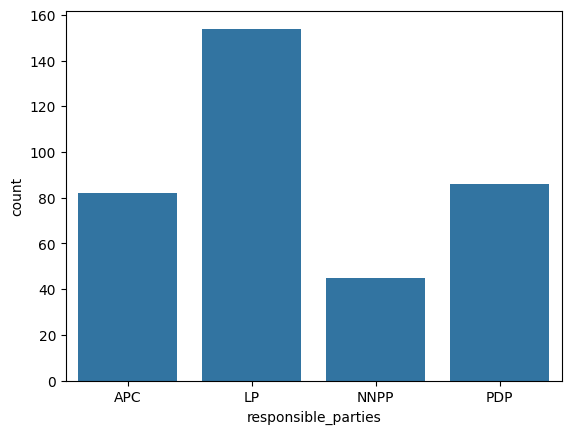

In [ ]:
df_exploded = df_exploded.sort_values(by='responsible_parties')
sns.countplot(x='responsible_parties', data=df_exploded)
plt.show()

In [ ]:
outlier_polling_units_df['Responsible_Parties'] = responsible_parties_df['responsible_parties']
outlier_polling_units_df.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,NNPP,Results_File,location.latitude,location.longitude,PU-Clusters,APC_z_score,PDP_z_score,LP_z_score,NNPP_z_score,Responsible_Parties
31,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-036,"20, IPAYE STREET",98,633,True,-1,False,...,5,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.633127,3.388001,0,0.157446,3.445583,-0.598075,1.312598,[PDP]
35,LAGOS,AGEGE,ISALE/IDIMANGORO,24-01-01-043,"3, OLOKO STREET",116,791,True,-1,False,...,8,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.624398,3.277510,0,0.821777,3.760670,-0.786820,2.214700,[PDP]
112,LAGOS,AGEGE,ONIWAYA/PAPA-UKU,24-01-03-074,"8, MORICASS ROAD",134,913,True,-1,False,...,11,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.619070,3.316442,0,1.765826,0.452257,-0.765848,3.116802,[NNPP]
118,LAGOS,AGEGE,AGBOTIKUYO/DOPEMU,24-01-04-003,OYEWOLE ROAD I,109,802,True,-1,False,...,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.620982,3.306376,0,0.367235,3.445583,-0.346416,-0.190905,[PDP]
190,LAGOS,AGEGE,OKEKOTO,24-01-06-008,"1, AWOYINFA STREET",87,697,True,-1,False,...,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.624636,3.322671,0,0.297305,4.075757,-0.849735,-0.190905,[PDP]


In [ ]:
# sort the outlier_polling_units_df by the outlier scores in descending order
outlier_polling_units_df = outlier_polling_units_df.sort_values(by=['APC_z_score', 'PDP_z_score', 'LP_z_score', 'NNPP_z_score'], ascending=False)

In [ ]:
outlier_polling_units_df

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,NNPP,Results_File,location.latitude,location.longitude,PU-Clusters,APC_z_score,PDP_z_score,LP_z_score,NNPP_z_score,Responsible_Parties
2577,LAGOS,IFAKO-IJAYE,IJU-OBAWOLE,24-10-06-008,OGUNDIMU PRY. SCH.,700,8522,True,-1,False,...,4,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.642600,3.322676,0,10.472058,3.445583,5.546612,1.011897,"[APC, PDP, LP]"
5867,LAGOS,SURULERE,IPONRI HOUSING ESTATE/ERIC MOORE,24-20-09-020,BOOTH AT BLOCK NO. 13,139,677,True,-1,False,...,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.484597,3.356525,0,8.898643,4.390844,0.177875,-0.190905,"[APC, PDP]"
5840,LAGOS,SURULERE,ADENIRAN/OGUNSANYA,24-20-08-017,"BLK. 44, ALH. MASHA ROAD",323,1154,True,-1,False,...,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.503217,3.348987,0,8.234312,-0.020374,-0.178643,-0.190905,[APC]
2532,LAGOS,IFAKO-IJAYE,FAGBA/AKUTE ROAD,24-10-04-010,"1, ALH. GANIYU ST. IJU I",148,715,True,-1,False,...,255,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.661190,3.322807,0,7.045509,48.345481,7.014626,76.487765,"[APC, PDP, LP, NNPP]"
3196,LAGOS,IKORODU,ERIKORODU,24-12-17-003,JUNCTION OF ERUWEN/ERUWEN EKITI VILLAGE,634,2070,True,-1,False,...,6,https://docs.inecelectionresults.net/elections...,6.612830,3.501180,28,6.177393,1.523949,5.754682,5.210397,"[APC, LP, NNPP]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4777,LAGOS,OJO,ILOGBO,24-17-06-023,OPEN SPACE WITHIN ADALOKO VILLAGE,171,1607,True,-1,False,...,1,https://docs.inecelectionresults.net/elections...,6.462454,3.167226,0,-1.311075,-0.650548,3.239733,0.109795,[LP]
6708,LAGOS,AMUWO-ODOFIN,IJEGUN,24-04-06-042,LAWANSON JUNCTION IJEGUN,215,295,True,-1,False,...,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.446152,3.263103,0,-1.311075,-0.808091,3.302648,-0.190905,[LP]
4622,LAGOS,OJO,OJO TOWN,24-17-01-006,AT THE BARRACKS B/STOP II,173,789,True,-1,True,...,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,6.460009,3.228578,0,-1.346039,-0.808091,10.789519,-0.190905,[LP]
6758,LAGOS,AMUWO-ODOFIN,SATELLITE,24-04-07-078,IN FRONT OF FIRST BANK ESTATE,200,250,True,-1,False,...,0,https://docs.inecelectionresults.net/elections...,6.448615,3.256171,0,-1.346039,-0.808091,3.009045,-0.190905,[LP]


In [ ]:
outlier_polling_units_df.columns

Index(['State', 'LGA', 'Ward', 'PU-Code', 'PU-Name', 'Accredited_Voters',
       'Registered_Voters', 'Results_Found', 'Transcription_Count',
       'Result_Sheet_Stamped', 'Result_Sheet_Corrected',
       'Result_Sheet_Invalid', 'Result_Sheet_Unclear', 'Result_Sheet_Unsigned',
       'APC', 'LP', 'PDP', 'NNPP', 'Results_File', 'location.latitude',
       'location.longitude', 'PU-Clusters', 'APC_z_score', 'PDP_z_score',
       'LP_z_score', 'NNPP_z_score', 'Responsible_Parties'],
      dtype='object')

In [ ]:
sorted_outlier_polling_units = outlier_polling_units_df.filter(['State','LGA','Ward', 'PU-Name', 'APC', 'LP', 'PDP', 'NNPP', 'PU-Clusters', 'APC_z_score', 'PDP_z_score',
       'LP_z_score', 'NNPP_z_score', 'Responsible_Parties'])
sorted_outlier_polling_units

,State,LGA,Ward,PU-Name,APC,LP,PDP,NNPP,PU-Clusters,APC_z_score,PDP_z_score,LP_z_score,NNPP_z_score,Responsible_Parties
2577,LAGOS,IFAKO-IJAYE,IJU-OBAWOLE,OGUNDIMU PRY. SCH.,338,310,27,4,0,10.472058,3.445583,5.546612,1.011897,"[APC, PDP, LP]"
5867,LAGOS,SURULERE,IPONRI HOUSING ESTATE/ERIC MOORE,BOOTH AT BLOCK NO. 13,293,54,33,0,0,8.898643,4.390844,0.177875,-0.190905,"[APC, PDP]"
5840,LAGOS,SURULERE,ADENIRAN/OGUNSANYA,"BLK. 44, ALH. MASHA ROAD",274,37,5,0,0,8.234312,-0.020374,-0.178643,-0.190905,[APC]
2532,LAGOS,IFAKO-IJAYE,FAGBA/AKUTE ROAD,"1, ALH. GANIYU ST. IJU I",240,380,312,255,0,7.045509,48.345481,7.014626,76.487765,"[APC, PDP, LP, NNPP]"
3196,LAGOS,IKORODU,ERIKORODU,JUNCTION OF ERUWEN/ERUWEN EKITI VILLAGE,342,260,15,6,28,6.177393,1.523949,5.754682,5.210397,"[APC, LP, NNPP]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4777,LAGOS,OJO,ILOGBO,OPEN SPACE WITHIN ADALOKO VILLAGE,1,200,1,1,0,-1.311075,-0.650548,3.239733,0.109795,[LP]
6708,LAGOS,AMUWO-ODOFIN,IJEGUN,LAWANSON JUNCTION IJEGUN,1,203,0,0,0,-1.311075,-0.808091,3.302648,-0.190905,[LP]
4622,LAGOS,OJO,OJO TOWN,AT THE BARRACKS B/STOP II,0,560,0,0,0,-1.346039,-0.808091,10.789519,-0.190905,[LP]
6758,LAGOS,AMUWO-ODOFIN,SATELLITE,IN FRONT OF FIRST BANK ESTATE,0,189,0,0,0,-1.346039,-0.808091,3.009045,-0.190905,[LP]


### __LP Outlier Polling Units__

In [ ]:
mask = sorted_outlier_polling_units['Responsible_Parties'].apply(lambda x: 'LP' in x)

# Apply the mask to filter the DataFrame
filtered_df = sorted_outlier_polling_units[mask]

#print(filtered_df)
 # convert the filtered_df to dataframe
filtered_df = pd.DataFrame(filtered_df)
filtered_df


,State,LGA,Ward,PU-Name,APC,LP,PDP,NNPP,PU-Clusters,APC_z_score,PDP_z_score,LP_z_score,NNPP_z_score,Responsible_Parties
2577,LAGOS,IFAKO-IJAYE,IJU-OBAWOLE,OGUNDIMU PRY. SCH.,338,310,27,4,0,10.472058,3.445583,5.546612,1.011897,"[APC, PDP, LP]"
2532,LAGOS,IFAKO-IJAYE,FAGBA/AKUTE ROAD,"1, ALH. GANIYU ST. IJU I",240,380,312,255,0,7.045509,48.345481,7.014626,76.487765,"[APC, PDP, LP, NNPP]"
3196,LAGOS,IKORODU,ERIKORODU,JUNCTION OF ERUWEN/ERUWEN EKITI VILLAGE,342,260,15,6,28,6.177393,1.523949,5.754682,5.210397,"[APC, LP, NNPP]"
3457,LAGOS,KOSOFE,ISHERI-OLOWO-IRA/SHANGISHA/MAGODO PHASE I & II,BY THE GATE OF TOKUNBO MACAULAY ST. ON EMMANUE...,192,288,18,2,0,5.367199,2.027692,5.085236,0.410496,"[APC, LP]"
3443,LAGOS,KOSOFE,ISHERI-OLOWO-IRA/SHANGISHA/MAGODO PHASE I & II,OPEN SPACE BESIDE MAGODO/SHANGISHA POLICE POST,146,251,7,2,0,3.758819,0.294713,4.309286,0.410496,"[APC, LP]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4777,LAGOS,OJO,ILOGBO,OPEN SPACE WITHIN ADALOKO VILLAGE,1,200,1,1,0,-1.311075,-0.650548,3.239733,0.109795,[LP]
6708,LAGOS,AMUWO-ODOFIN,IJEGUN,LAWANSON JUNCTION IJEGUN,1,203,0,0,0,-1.311075,-0.808091,3.302648,-0.190905,[LP]
4622,LAGOS,OJO,OJO TOWN,AT THE BARRACKS B/STOP II,0,560,0,0,0,-1.346039,-0.808091,10.789519,-0.190905,[LP]
6758,LAGOS,AMUWO-ODOFIN,SATELLITE,IN FRONT OF FIRST BANK ESTATE,0,189,0,0,0,-1.346039,-0.808091,3.009045,-0.190905,[LP]


In [ ]:
# filtered_df to csv
filtered_df.to_csv('LP_outlier_polling_units.csv', index=False)

In [ ]:
sorted_outlier_polling_units.to_csv('Sorted_outlier_polling_units.csv', index=False)

In [ ]:
outlier_polling_units_df.to_csv('Sorted Oulier Polling Units.csv', index=False)

__APC Outlier Polling Units__

In [ ]:
mask = sorted_outlier_polling_units['Responsible_Parties'].apply(lambda x: 'APC' in x)

# Apply the mask to filter the DataFrame
filtered_df = sorted_outlier_polling_units[mask]

#print(filtered_df)
 # convert the filtered_df to dataframe
filtered_df = pd.DataFrame(filtered_df)
filtered_df

,State,LGA,Ward,PU-Name,APC,LP,PDP,NNPP,PU-Clusters,APC_z_score,PDP_z_score,LP_z_score,NNPP_z_score,Responsible_Parties
2577,LAGOS,IFAKO-IJAYE,IJU-OBAWOLE,OGUNDIMU PRY. SCH.,338,310,27,4,0,10.472058,3.445583,5.546612,1.011897,"[APC, PDP, LP]"
5867,LAGOS,SURULERE,IPONRI HOUSING ESTATE/ERIC MOORE,BOOTH AT BLOCK NO. 13,293,54,33,0,0,8.898643,4.390844,0.177875,-0.190905,"[APC, PDP]"
5840,LAGOS,SURULERE,ADENIRAN/OGUNSANYA,"BLK. 44, ALH. MASHA ROAD",274,37,5,0,0,8.234312,-0.020374,-0.178643,-0.190905,[APC]
2532,LAGOS,IFAKO-IJAYE,FAGBA/AKUTE ROAD,"1, ALH. GANIYU ST. IJU I",240,380,312,255,0,7.045509,48.345481,7.014626,76.487765,"[APC, PDP, LP, NNPP]"
3196,LAGOS,IKORODU,ERIKORODU,JUNCTION OF ERUWEN/ERUWEN EKITI VILLAGE,342,260,15,6,28,6.177393,1.523949,5.754682,5.210397,"[APC, LP, NNPP]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,LAGOS,KOSOFE,AGBOYI I,ITA OLOKUN COMPOUND (RIGHT HANDSIDE),125,7,21,0,0,3.024559,2.500322,-0.807792,-0.190905,[APC]
4775,LAGOS,OJO,ILOGBO,OPEN SPACE AT THE JUNCTION OF ITIRE ILOGBO PLA...,125,139,13,3,0,3.024559,1.239974,1.960463,0.711197,[APC]
3548,LAGOS,LAGOS ISLAND,AGARAWU/OBADINA,N/AZIKIWE/OLOGUN ST.,125,9,8,0,0,3.024559,0.452257,-0.765848,-0.190905,[APC]
9153,LAGOS,SURULERE,SHITTA/OGUNLANA DRIVE,SPACE BETWEEN BLOCK 13A AND 13B ALHAJI MASHA R...,125,43,7,0,0,3.024559,0.294713,-0.052813,-0.190905,[APC]


In [ ]:
# filtered_df to csv
filtered_df.to_csv('APC_outlier_polling_units.csv', index=False)

### __PDP Outlier Polling Units__

In [ ]:
mask = sorted_outlier_polling_units['Responsible_Parties'].apply(lambda x: 'PDP' in x)

# Apply the mask to filter the DataFrame
filtered_df = sorted_outlier_polling_units[mask]

#print(filtered_df)
 # convert the filtered_df to dataframe
filtered_df = pd.DataFrame(filtered_df)
filtered_df

,State,LGA,Ward,PU-Name,APC,LP,PDP,NNPP,PU-Clusters,APC_z_score,PDP_z_score,LP_z_score,NNPP_z_score,Responsible_Parties
2577,LAGOS,IFAKO-IJAYE,IJU-OBAWOLE,OGUNDIMU PRY. SCH.,338,310,27,4,0,10.472058,3.445583,5.546612,1.011897,"[APC, PDP, LP]"
5867,LAGOS,SURULERE,IPONRI HOUSING ESTATE/ERIC MOORE,BOOTH AT BLOCK NO. 13,293,54,33,0,0,8.898643,4.390844,0.177875,-0.190905,"[APC, PDP]"
2532,LAGOS,IFAKO-IJAYE,FAGBA/AKUTE ROAD,"1, ALH. GANIYU ST. IJU I",240,380,312,255,0,7.045509,48.345481,7.014626,76.487765,"[APC, PDP, LP, NNPP]"
1950,LAGOS,BADAGRY,ILOGBO-ARAROMI,INSIDE COMM. HALL ARAROMI,165,102,44,0,0,4.423150,6.123823,1.184513,-0.190905,"[APC, PDP]"
1936,LAGOS,BADAGRY,IWORO GBANKO,ANY CONVENIENCE SPACE ALONG SURULERE ST. IWORO,154,6,52,0,0,4.038537,7.384171,-0.828763,-0.190905,"[APC, PDP]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,LAGOS,ETI-OSA,ILADO/ETI-OSA AND ENVIRONS,FLAT 548 IKOTA ESTATE II,0,539,124,0,20,-0.844466,3.860885,3.573550,-0.483226,"[PDP, LP]"
4927,LAGOS,OSHODI/ISOLO,ORILE-OSHODI,"52, OSHODI ROAD",14,12,25,0,0,-0.856532,3.130496,-0.702933,-0.190905,[PDP]
2391,LAGOS,ETI-OSA,OBALENDE,AJENIYA STR./OJO ST.,2,88,45,0,0,-1.276110,6.281366,0.890910,-0.190905,[PDP]
6795,LAGOS,APAPA,APAPA II (LIVERPOOL RD. AND ENVIRONS),"BESIDE AZARE CRESCENT, LIVERPOOL",1,36,44,50,0,-1.311075,6.123823,-0.199614,14.844128,"[PDP, NNPP]"


In [ ]:
# PDP outlier polling units to csv
filtered_df.to_csv('PDP_outlier_polling_units.csv', index=False)

###__NNPP outlier polling units__

In [ ]:
mask = sorted_outlier_polling_units['Responsible_Parties'].apply(lambda x: 'NNPP' in x)

# Apply the mask to filter the DataFrame
filtered_df = sorted_outlier_polling_units[mask]

#print(filtered_df)
 # convert the filtered_df to dataframe
filtered_df = pd.DataFrame(filtered_df)
filtered_df

,State,LGA,Ward,PU-Name,APC,LP,PDP,NNPP,PU-Clusters,APC_z_score,PDP_z_score,LP_z_score,NNPP_z_score,Responsible_Parties
2532,LAGOS,IFAKO-IJAYE,FAGBA/AKUTE ROAD,"1, ALH. GANIYU ST. IJU I",240,380,312,255,0,7.045509,48.345481,7.014626,76.487765,"[APC, PDP, LP, NNPP]"
3196,LAGOS,IKORODU,ERIKORODU,JUNCTION OF ERUWEN/ERUWEN EKITI VILLAGE,342,260,15,6,28,6.177393,1.523949,5.754682,5.210397,"[APC, LP, NNPP]"
3144,LAGOS,IKORODU,IGBOGBO I,"BAIYEKU/ORETA ROAD JUNCTION, IGBOGBO",201,164,7,5,28,3.013778,0.074948,3.283571,4.258743,"[APC, LP, NNPP]"
7945,LAGOS,IKORODU,IJEDE II,"INFRONT OF NO.1, FAKOLUJO STR, OFF PIPELINE IG...",274,122,10,5,46,2.648648,1.089819,2.422819,3.341869,[NNPP]
3118,LAGOS,IKORODU,IMOTA 1,U.P.E. PRY. SCHOOL OKE-AGBO,177,77,17,6,28,2.475290,1.886199,1.044127,5.210397,[NNPP]
3341,LAGOS,KOSOFE,KETU/ALAPERE/AGIDI/ORISIGUN/KOSOFE/AJELOGO/AKA...,"AGBOYI ROAD, IN FRONT OF HOUSE NO. 59",96,196,15,14,0,2.010580,1.555061,3.155846,4.018904,"[LP, NNPP]"
2683,LAGOS,IFAKO-IJAYE,ALAKUKO/KOLLINGTON,"20, ONIPINLA ST. OFF OLD ALAKUKO RD.",96,40,6,11,0,2.010580,0.137170,-0.115728,3.116802,[NNPP]
4796,LAGOS,OJO,ETEGBIN,EGAN COMMUNITY HALL,95,0,29,15,0,1.975615,3.760670,-0.954593,4.319605,"[PDP, NNPP]"
4669,LAGOS,OJO,OKOKOMAIKO,JUNCTION OF ALABA MARKET - ALONG BADAGRY EXP. ...,90,27,11,24,0,1.800791,0.924887,-0.388359,7.025911,[NNPP]
112,LAGOS,AGEGE,ONIWAYA/PAPA-UKU,"8, MORICASS ROAD",89,9,8,11,0,1.765826,0.452257,-0.765848,3.116802,[NNPP]


In [ ]:
# NNPP oultier polling units to csv
filtered_df.to_csv('NNPP_outlier_polling_units.csv', index=False)

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
coord

array([[0.11539565, 0.0580779 ],
       [0.1153673 , 0.05807721],
       [0.11536439, 0.05807652],
       ...,
       [0.11408861, 0.06123151],
       [0.11298215, 0.0559145 ],
       [0.1128645 , 0.0556934 ]])

In [ ]:
coordinates

,location.latitude,location.longitude,lat_radians,lon_radians,cluster
0,6.611684,3.327618,0.115396,0.058078,0
1,6.610059,3.327579,0.115367,0.058077,0
2,6.609893,3.327540,0.115364,0.058077,0
3,6.614014,3.325041,0.115436,0.058033,0
4,6.614014,3.325041,0.115436,0.058033,0
...,...,...,...,...,...
9169,6.537352,3.517419,0.114098,0.061391,45
9170,6.536796,3.508307,0.114089,0.061232,-1
9171,6.536796,3.508307,0.114089,0.061232,-1
9172,6.473401,3.203665,0.112982,0.055914,0


### __Getting the Nearest Neighbors__

In [ ]:
coord = coordinates[['lat_radians' , 'lon_radians']].to_numpy()

In [ ]:
model = NearestNeighbors(n_neighbors=10, algorithm= 'ball_tree', metric = 'haversine')
model.fit(coord)

NearestNeighbors(algorithm='ball_tree', metric='haversine', n_neighbors=10)

In [ ]:
polling_units = [ 2577, 5867, 5840]

In [ ]:
distances , indices = model.kneighbors(coord)

In [ ]:
#  get the nearest neighbors of indices in polling units
nearest_neighbors = indices[polling_units]

In [ ]:
coordinates['neighbors'] = indices.tolist()

In [ ]:
coordinates

,location.latitude,location.longitude,lat_radians,lon_radians,cluster,neighbors
0,6.611684,3.327618,0.115396,0.058078,0,"[0, 6045, 8134, 1, 2, 2978, 8, 5, 6046, 11]"
1,6.610059,3.327579,0.115367,0.058077,0,"[1, 2, 41, 6045, 11, 0, 6024, 6025, 8134, 8]"
2,6.609893,3.327540,0.115364,0.058077,0,"[2, 1, 41, 11, 6045, 0, 6024, 6025, 8134, 2787]"
3,6.614014,3.325041,0.115436,0.058033,0,"[4, 3, 24, 22, 6, 6046, 6050, 32, 21, 2978]"
4,6.614014,3.325041,0.115436,0.058033,0,"[4, 3, 24, 22, 6, 6046, 6050, 32, 21, 2978]"
...,...,...,...,...,...,...
9169,6.537352,3.517419,0.114098,0.061391,45,"[9169, 3157, 9163, 3155, 3156, 3153, 9167, 916..."
9170,6.536796,3.508307,0.114089,0.061232,-1,"[9170, 9171, 3157, 9169, 3155, 9167, 3153, 916..."
9171,6.536796,3.508307,0.114089,0.061232,-1,"[9170, 9171, 3157, 9169, 3155, 9167, 3153, 916..."
9172,6.473401,3.203665,0.112982,0.055914,0,"[4637, 8627, 8626, 4654, 8635, 4638, 9172, 861..."


In [ ]:
coordinates.loc[2577]

location.latitude                                                6.6426
location.longitude                                             3.322676
lat_radians                                                    0.115935
lon_radians                                                    0.057992
cluster                                                               0
neighbors             [2483, 2577, 2508, 2504, 2498, 2484, 2475, 248...
Name: 2577, dtype: object

In [ ]:
coordinates.loc[[2577, 5867, 5840]]

,location.latitude,location.longitude,lat_radians,lon_radians,cluster,neighbors
2577,6.642600,3.322676,0.115935,0.057992,0,"[2483, 2577, 2508, 2504, 2498, 2484, 2475, 248..."
5867,6.484597,3.356525,0.113178,0.058582,0,"[5867, 5864, 5866, 5865, 5855, 5858, 5859, 905..."
5840,6.503217,3.348987,0.113503,0.058451,0,"[5840, 5822, 5821, 9098, 5993, 5978, 5977, 583..."


In [ ]:
poll1 = pd.DataFrame(coordinates.loc[[2577, 5867, 5840]])
poll1


,location.latitude,location.longitude,lat_radians,lon_radians,cluster,neighbors
2577,6.642600,3.322676,0.115935,0.057992,0,"[2483, 2577, 2508, 2504, 2498, 2484, 2475, 248..."
5867,6.484597,3.356525,0.113178,0.058582,0,"[5867, 5864, 5866, 5865, 5855, 5858, 5859, 905..."
5840,6.503217,3.348987,0.113503,0.058451,0,"[5840, 5822, 5821, 9098, 5993, 5978, 5977, 583..."


In [ ]:
poll1.neighbors
# return full value of neighbors

2577    [2483, 2577, 2508, 2504, 2498, 2484, 2475, 248...
5867    [5867, 5864, 5866, 5865, 5855, 5858, 5859, 905...
5840    [5840, 5822, 5821, 9098, 5993, 5978, 5977, 583...
Name: neighbors, dtype: object

In [ ]:
New_Lagos.loc[[2577,2483, 2577, 2508, 2504, 2498, 2484, 2475]].filter(['APC', 'PDP', 'LP', 'NNPP'])

,APC,PDP,LP,NNPP
2577,338,27,310,4
2483,83,7,78,0
2577,338,27,310,4
2508,30,9,19,0
2504,85,8,89,2
2498,22,6,32,1
2484,71,5,48,0
2475,53,6,23,0
